#california housing prices dataset
The data contains information from the 1990 California census.The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data.

###uasage:
This dataset may be used for price evaluation (not completely accurate), education, etc.

###number of cases:
The dataset contains a total of 20640 cases.

###variables:
1. **longitude**: A measure of how far west a house is; a higher value is farther west

2. **latitude**: A measure of how far north a house is; a higher value is farther north

3. **housingMedianAge**: Median age of a house within a block; a lower number is a newer building

4. **totalRooms**: Total number of rooms within a block

5. **totalBedrooms**: Total number of bedrooms within a block

6. **population**: Total number of people residing within a block

7. **households**: Total number of households, a group of people residing within a home unit, for a block

8. **medianIncome**: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. **medianHouseValue**: Median house value for households within a block (measured in US Dollars)

10. **oceanProximity**: Location of the house w.r.t ocean/sea

In [ ]:
#provide dataset

In [ ]:
#for linaer algebra
import numpy as np

#for data processing
import pandas as pd

#load dataset and see the head
column_names = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income",
                "median_house_value", "ocean_proximity"]
df = pd.read_csv('/content/housing.csv', header=None, delimiter=r",", names=column_names)
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [ ]:
df.shape

(20640, 10)

In [ ]:
df.size

206400

In [ ]:
#summurize data for earn an overview
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

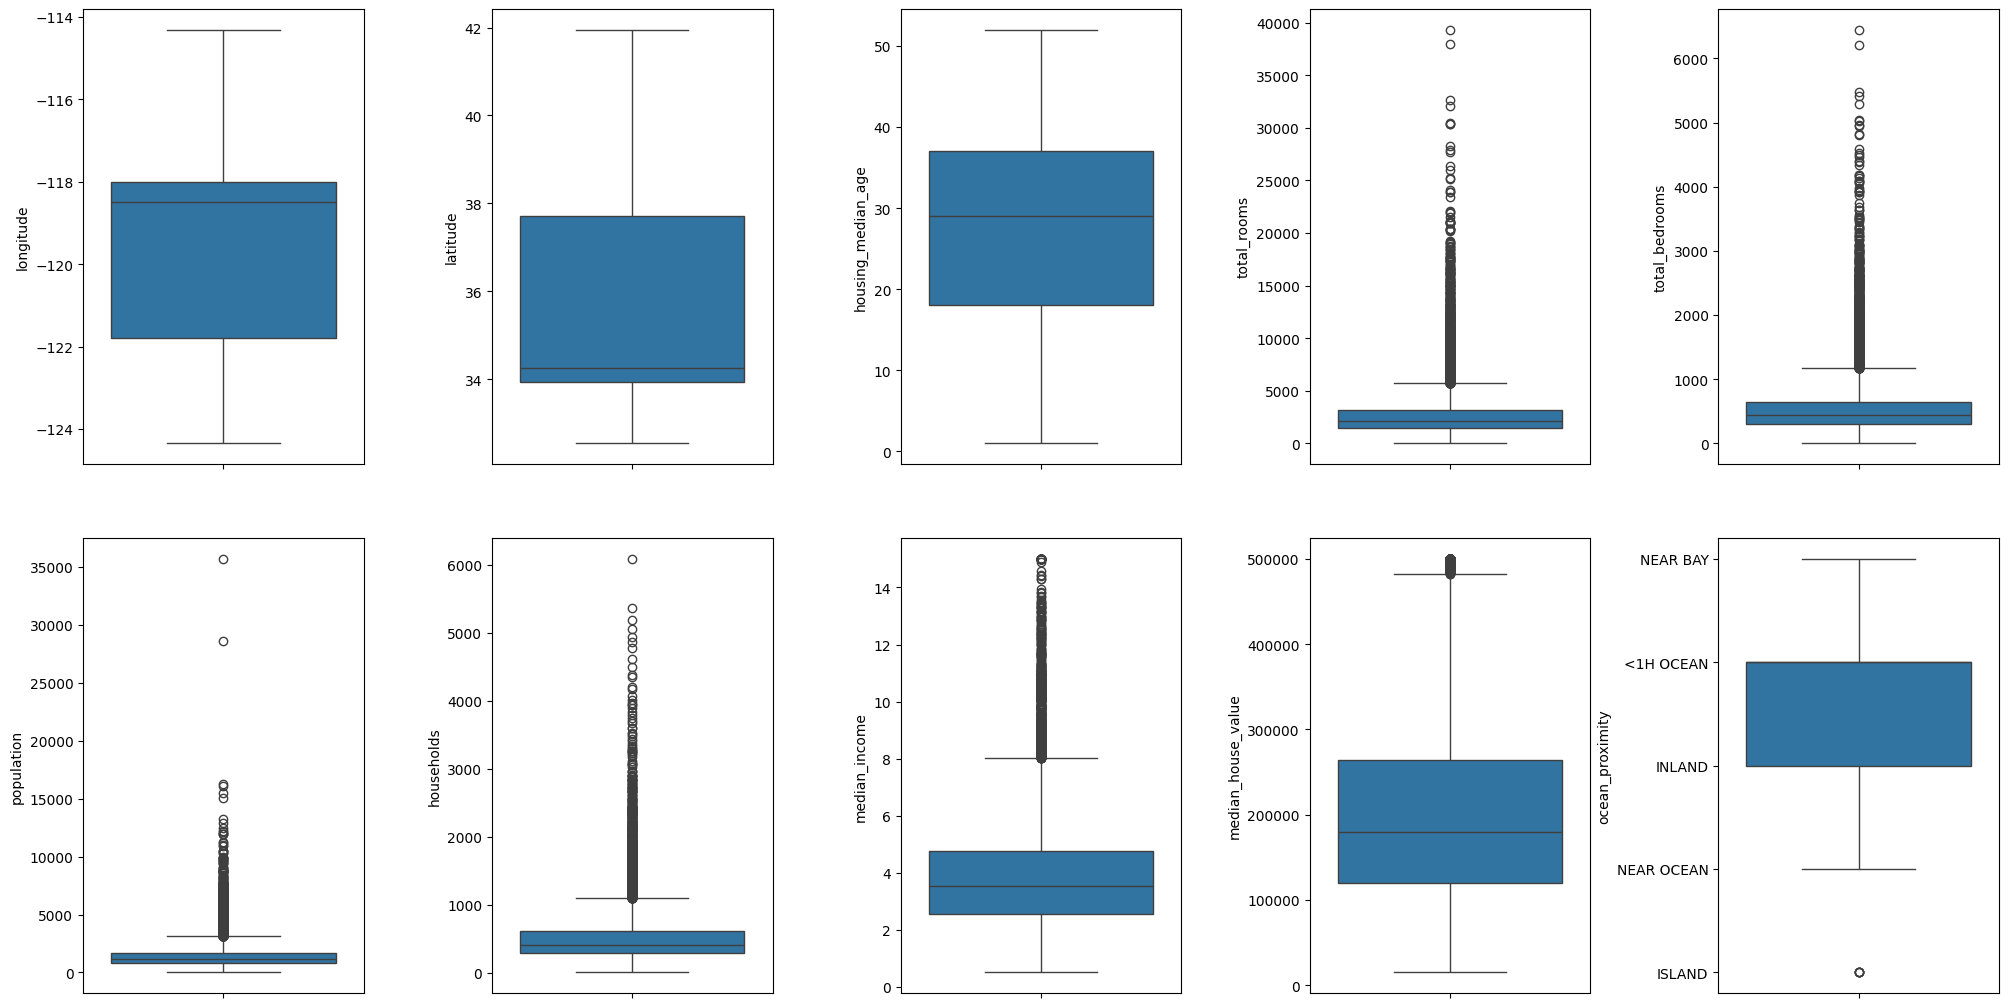

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for k, v in df.items():
  sns.boxplot(y=k, data=df, ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
#outlier percentage
for k, v in df.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  outlier = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  percentage = np.shape(outlier)[0] * 100.0 / np.shape(df)[0]
  print("column %s outliers = %.2f%%" % (k, percentage))

column longitude outliers = 0.00%
column latitude outliers = 0.00%
column housing_median_age outliers = 0.00%
column total_rooms outliers = 6.24%
column total_bedrooms outliers = 6.16%
column population outliers = 5.80%
column households outliers = 5.91%
column median_income outliers = 3.30%
column median_house_value outliers = 5.19%


TypeError: unsupported operand type(s) for -: 'str' and 'str'

remove median_house_value outlier


In [ ]:
df = df[~(df['median_house_value'] >= 500001.000000)]
print(np.shape(df))

(19675, 10)


In [ ]:
df.size

196750

median_house_value distribution

(array([  36.,  841., 1628., 1984., 1878., 2221., 2153., 1618., 1591.,
        1208., 1075.,  692.,  569.,  670.,  437.,  316.,  245.,  234.,
         145.,  134.]),
 array([ 14999.  ,  39249.05,  63499.1 ,  87749.15, 111999.2 , 136249.25,
        160499.3 , 184749.35, 208999.4 , 233249.45, 257499.5 , 281749.55,
        305999.6 , 330249.65, 354499.7 , 378749.75, 402999.8 , 427249.85,
        451499.9 , 475749.95, 500000.  ]),
 <BarContainer object of 20 artists>)

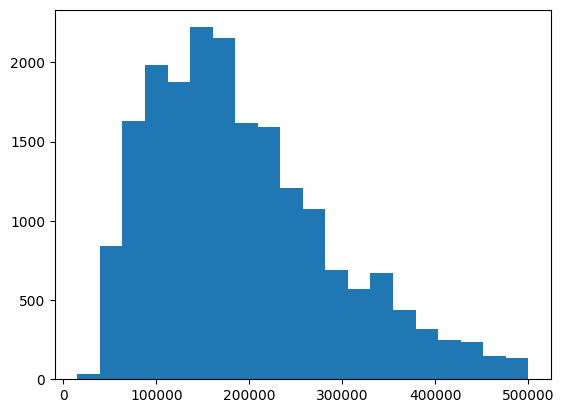

In [ ]:
plt.hist(df['median_house_value'], bins=20)

ValueError: could not convert string to float: 'NEAR BAY'

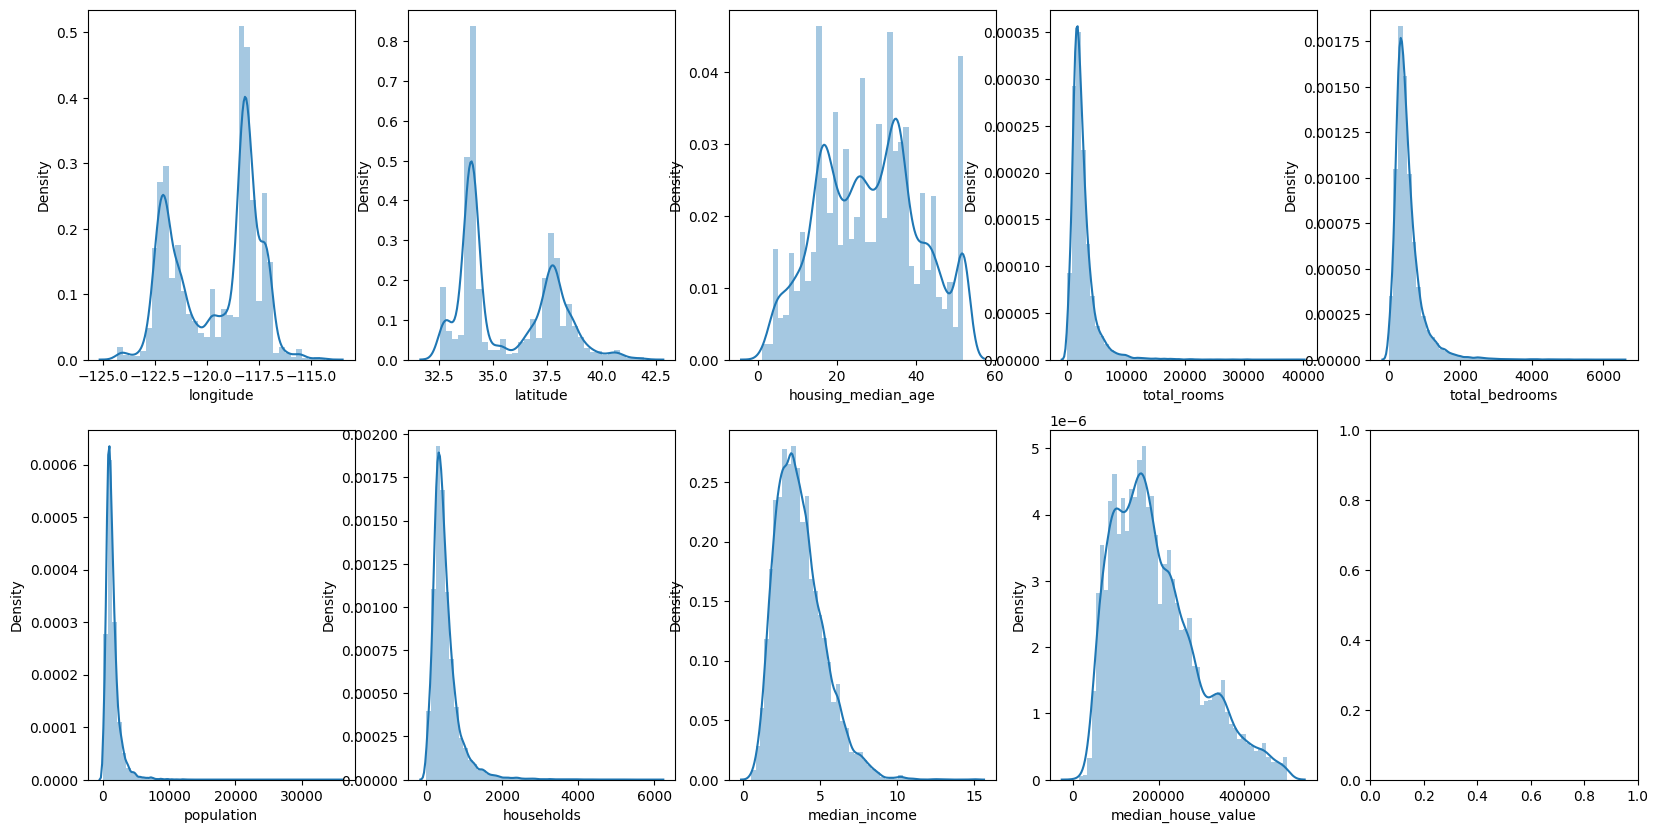

In [ ]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()
for k, v in df.items():
  sns.distplot(v, ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad= 0.5, h_pad=5.0)

<Axes: >

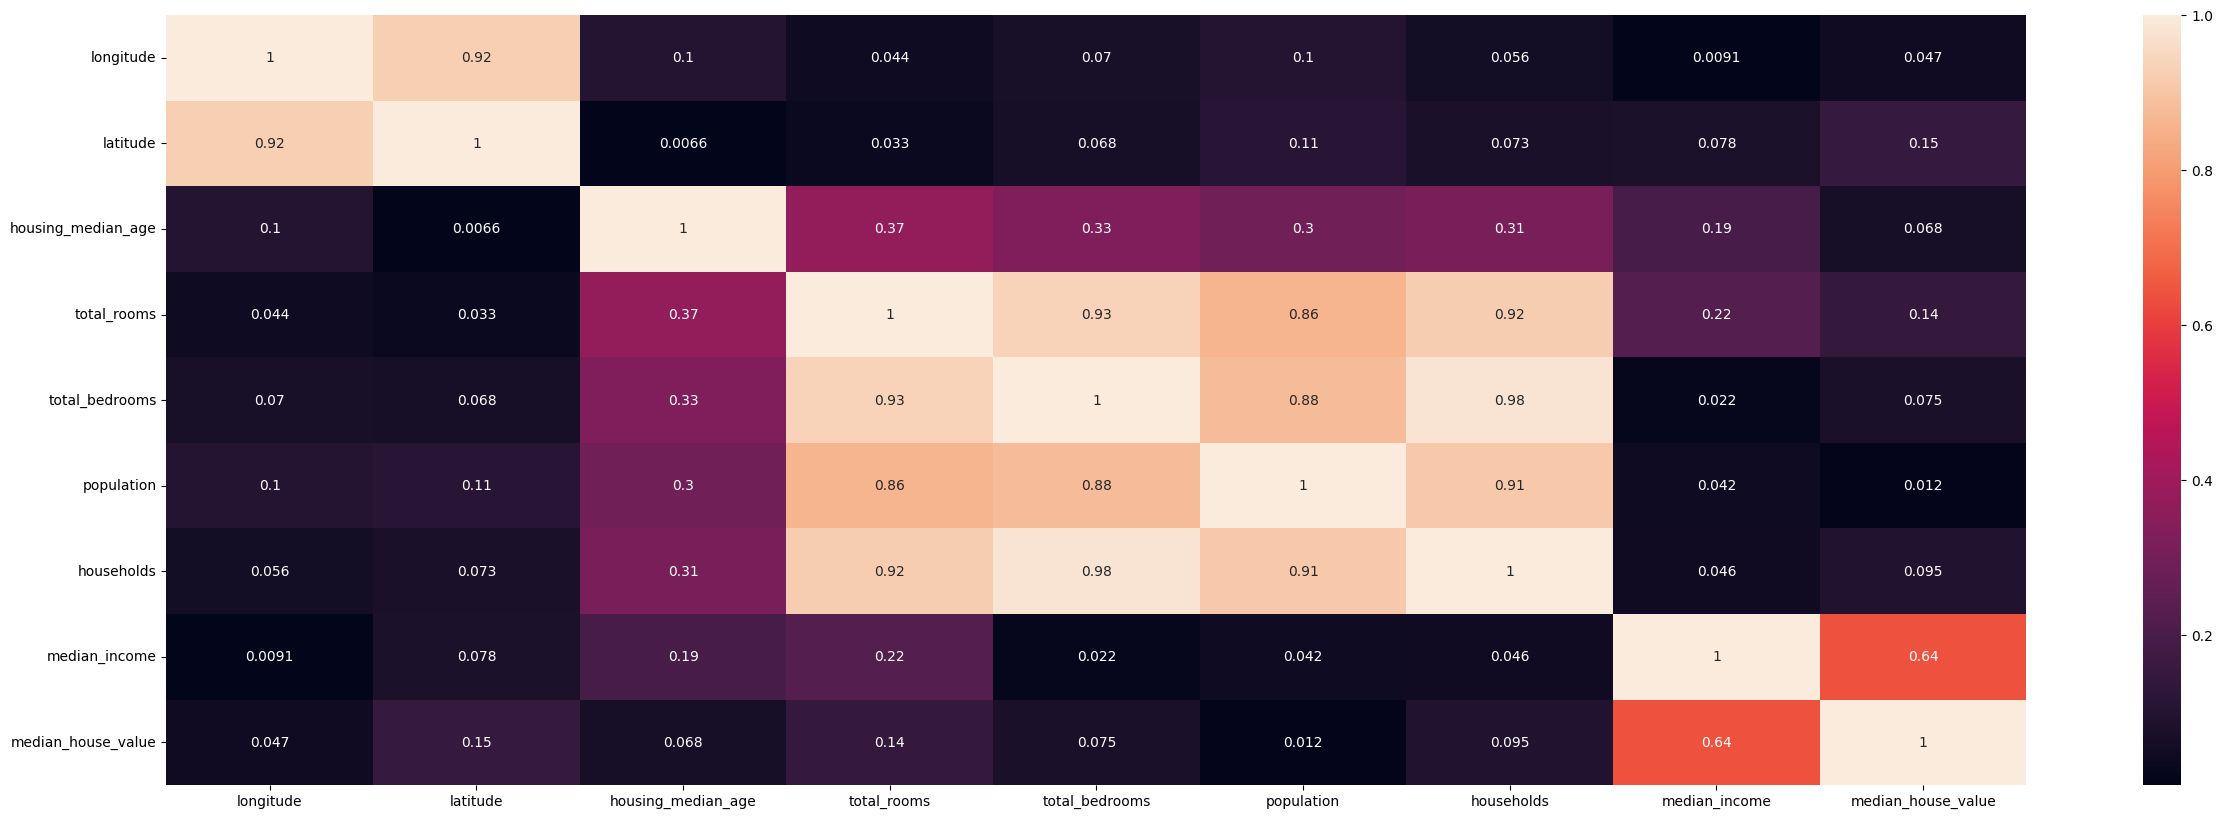

In [ ]:
plt.figure(figsize=(30, 10))
sns.heatmap(df.corr().abs(), annot=True)

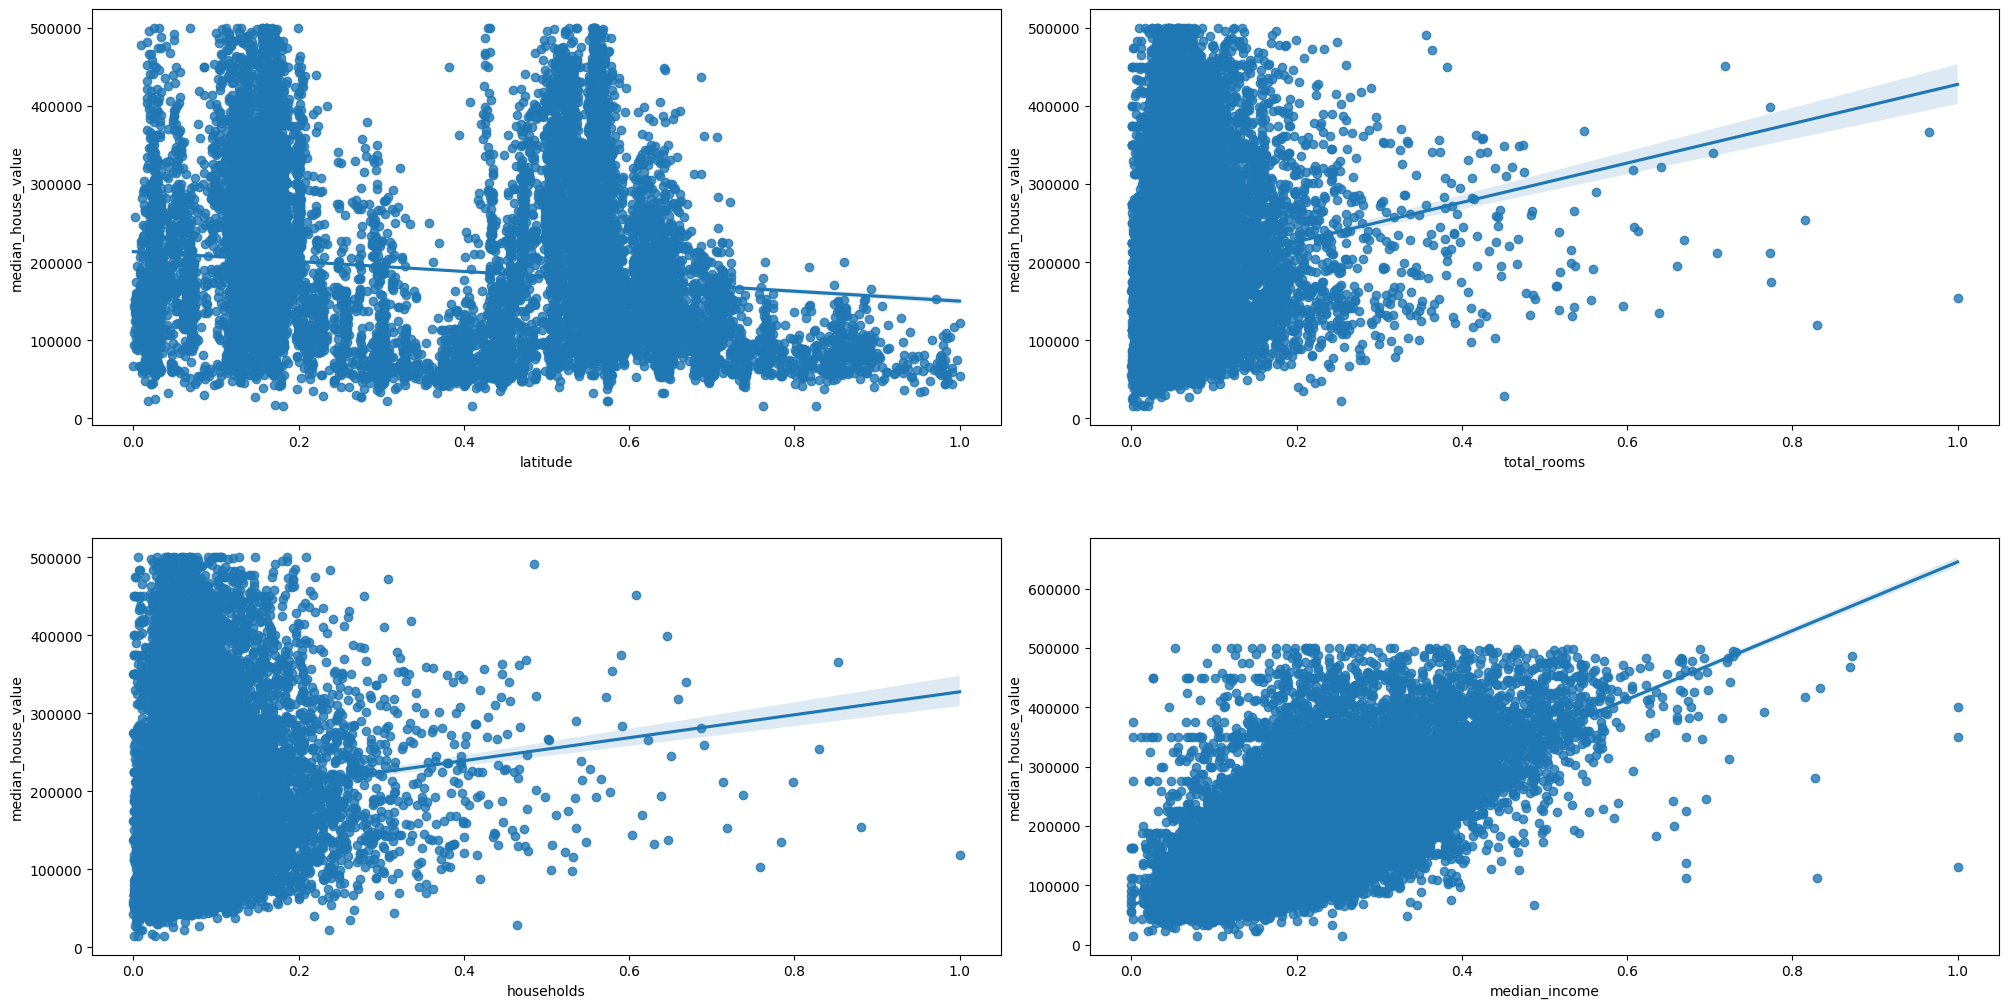

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
wanted_columns = ['latitude', 'total_rooms', 'households', 'median_income']
x = df.loc[:,wanted_columns]
y = df['median_house_value']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=wanted_columns)
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20,10))
axs = axs.flatten()
for i, k in enumerate(wanted_columns):
  sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
y = np.log1p(y)
for col in x.columns:
  if np.abs(x[col].skew() > 0.3):
    x[col] = np.log1p(x[col])

#chalanges:
1."total_bedrooms" feature have sum null value

2."ocean_proximity" feature have str values and make some problems in tasks that related to statistical work

#resource:
[California-House-Price-Prediction](https://www.github.com/sonarsushant/California-House-Price-Prediction/blob/master/housing.csv)

#final word:

thanks to reza shokrazad.

it is my first data science project in google colab.

author:Donsalehi